# **Fiscal Indicators and Property Value Trends in Connecticut Towns (2019-2022)**



---
### *A Four-Year Analysis of Fiscal Patterns and Property Value Change*

This notebook explores recent fiscal and property value trends across Connecticut towns using data from the Office of Policy and Management. Covering the years 2019 to 2022, the dataset includes information on municipal grand lists (total taxable property value), local mill rates (property tax rates), and population changes. Together, these indicators help reveal how towns vary in their financial capacity, tax burden, and economic growth.

Understanding Connecticut’s housing market is more than just looking at home prices. It’s about how towns are growing — or shrinking — in terms of both population and property value. In this story, we explore which towns are on the rise, which ones are slowing down, and what this means for the future of housing in the state.

**Motivation**

Every town in Connecticut depends on property taxes to pay for schools, roads, and local services. But not all towns have the same kind of property wealth, and not all charge the same tax rates. This data is important by itself — but it makes more sense when we compare it to real estate trends and population shifts. For example, a town with rising home values might collect more in taxes even with a low rate. A town with many seniors or fewer residents might have to raise rates to cover costs. This notebook helps connect the money side of things to the people and the housing market.

I was curious how fiscal indicators like property values (grand list), local tax rates (mill rate), and population trends relate to housing activity.
This project looks to answer questions like:

- Which towns have seen the biggest increase in property value?
- Do towns with more people have more money to work with?
- Are some towns gaining both people and wealth, while others are falling behind?

My goal is to understand how these financial indicators differ across towns — and what that might tell us about the real estate market. I focused on recent years to keep the analysis relevant and comparable across datasets.



### Why this dataset?

I chose this dataset because it connects municipal wealth, taxes, and demographic change. It's useful for showing how different towns grow, struggle, or change direction. Since it covers every town in the state over multiple years, it gives a full picture of local economic conditions.

### Goal for end-user experience

The goal was to make a notebook that’s easy to understand and visually clear. It uses different types of charts and findings on how  people explore how taxes and property values work in different towns.

## **Basic stats**



*  Towns included: 169
*  Time span: 2019–2022

*   Metrics used: Grand List (USD), Mill Rate, Population
*  Total records after cleaning: ~650


*  Duplicates: Removed town-year repeats
*  Missing values: Removed rows missing any key metric
















## **Data Overview**

The dataset, published by the Connecticut Office of Policy and Management, provides annual fiscal and demographic data for each municipality from 2019 to 2022. It includes information on grand list values, mill rates, and population estimates, helping to show how each town’s tax base and local economy have changed over time.

Source: Municipal Fiscal Indicators (2019–2024) (https://catalog.data.gov/dataset/municipal-fiscal-indicators-economic-and-grand-list-data-2019-2024)

Each record includes:

- **Municipality Name**: The town or city being analyzed
- **Grand List:**: Property tax rate (per $1,000 of assessed value)
- **Mill Rate**: Transaction date, falling between October 1 and September 30 of each grand list year  
- **Population**: Estimated number of residents in the town
- **Year**:The fiscal year the data applies to




Note: Population estimates are based on annual projections. Data may vary slightly between towns depending on local reporting.



In [ ]:
# Upload your CSV file from your computer
from google.colab import files
uploaded = files.upload()

# Load the uploaded file
import pandas as pd

# Replace with your actual filename if different
df = pd.read_csv("Municipal_Fiscal_Indicators__Economic_and_Grand_List_Data__2019-2024.csv")

# Display basic info
df.head()


Saving Municipal_Fiscal_Indicators__Economic_and_Grand_List_Data__2019-2024.csv to Municipal_Fiscal_Indicators__Economic_and_Grand_List_Data__2019-2024.csv


,Municipal Fiscal Indicators Report Edition,Year,Year type,Municipality name,Municipality FIPS GEOID,Municipality FIPS code,Municipality tax code,Metric,Value
0,Report Edition: 2018-2022,2024,Fiscal Year End,WOODSTOCK,915088190.0,88190.0,169.0,Mill rate: motor vehicle,2.241000e+01
1,Report Edition: 2018-2022,2024,Fiscal Year End,WOODSTOCK,915088190.0,88190.0,169.0,Mill rate: real and personal property,2.241000e+01
2,Report Edition: 2018-2022,2023,Fiscal Year End,WOODSTOCK,915088190.0,88190.0,169.0,Equalized net grand list,1.356865e+09
3,Report Edition: 2018-2022,2022,Calendar Year,WOODSTOCK,915088190.0,88190.0,169.0,Estimated population (DPH),8.312000e+03
4,Report Edition: 2018-2022,2022,Fiscal Year End,WOODSTOCK,915088190.0,88190.0,169.0,FYE total net grand list,7.405857e+08


## **Data Cleaning & Preprocessing**

The following preprocessing steps were applied to prepare the fiscal dataset for analysis:

- Renamed columns to make them easier to read and understand

- Made sure the year column was in the right format so we could sort and group it

- Removed rows that were missing important values like population, property value, or tax rate

- Removed any duplicate rows for the same town and year


These steps help create a clean, consistent dataset that’s ready for comparing towns and exploring patterns over time.

In [ ]:
# STEP 1: Filter for key metrics that are useful for storytelling
key_metrics = [
    "Estimated population (DPH)",
    "Equalized net grand list",
    "Mill rate: real and personal property"
]
df_filtered = df[df["Metric"].isin(key_metrics)].copy()

# STEP 2: Pivot the data so each town/year has its metrics in columns
df_pivot = df_filtered.pivot_table(
    index=["Municipality name", "Year"],
    columns="Metric",
    values="Value"
).reset_index()

# STEP 3: Rename columns for clarity
df_pivot.columns.name = None
df_pivot = df_pivot.rename(columns={
    "Estimated population (DPH)": "Population",
    "Equalized net grand list": "Grand List",
    "Mill rate: real and personal property": "Mill Rate"
})

# STEP 4: Drop rows with missing values in any of the key metrics
df_clean = df_pivot.dropna(subset=["Population", "Grand List", "Mill Rate"])

# Optional: Check for duplicated town-year combinations
df_clean = df_clean.drop_duplicates(subset=["Municipality name", "Year"])

# Show cleaned data
df_clean.head()


,Municipality name,Year,Grand List,Population,Mill Rate
0,ANDOVER,2019,3.840955e+08,3236.0,33.95
1,ANDOVER,2020,4.024898e+08,3149.0,35.88
2,ANDOVER,2021,3.942520e+08,3133.0,35.61
3,ANDOVER,2022,4.542862e+08,3150.0,35.88
6,ANSONIA,2019,1.406782e+09,18654.0,37.32


In [ ]:
# STEP 1: Sort by municipality and year to calculate changes over time
df_trends = df_clean.sort_values(["Municipality name", "Year"]).copy()

# STEP 2: Calculate year-over-year changes within each town
df_trends["Population Change"] = df_trends.groupby("Municipality name")["Population"].diff()
df_trends["Grand List Change"] = df_trends.groupby("Municipality name")["Grand List"].diff()
df_trends["Mill Rate Change"] = df_trends.groupby("Municipality name")["Mill Rate"].diff()

# STEP 3: Identify most recent change per town (latest year of data)
df_latest_trends = df_trends.dropna().sort_values("Year").groupby("Municipality name").tail(1)

# View sample of results
df_latest_trends[["Municipality name", "Year", "Population Change", "Grand List Change", "Mill Rate Change"]].head()


,Municipality name,Year,Population Change,Grand List Change,Mill Rate Change
969,WINCHESTER,2022,23.0,281866266.0,0.00
975,WINDHAM,2022,37.0,200029142.0,0.41
375,HAMPTON,2022,10.0,61459775.0,-1.73
381,HARTFORD,2022,110.0,579486083.0,0.00
321,GLASTONBURY,2022,145.0,468834108.0,0.42


What this data shows is a state of contrast. While some towns — like Glastonbury and Hartford — are drawing in more people and money, others are seeing only partial growth. A few towns are even shrinking, with fewer people and less valuable property.




In [ ]:
import plotly.express as px
#hover
fig = px.scatter(
    df_latest_trends,
    x="Population Change",
    y="Grand List Change",
    hover_name="Municipality name",
    title="Change in Population vs Grand List",
    labels={
        "Population Change": "Population Change",
        "Grand List Change": "Grand List Change (USD)"
    }
)
fig.show()


This scatter plot shows how much each Connecticut town’s population and grand list (total taxable property value) changed between years. Each dot represents one town, with population change on the x-axis and property value change on the y-axis.

Most towns cluster near the middle, showing only small changes in both population and property value. Towns further to the right saw larger population growth, while towns higher on the chart saw bigger increases in property value. However, a few towns stand out — either gaining lots of new residents, seeing big jumps in property value, or both. A small number of towns also lost population or saw drops in their grand list, which could be a sign of economic stress or shifting demand.








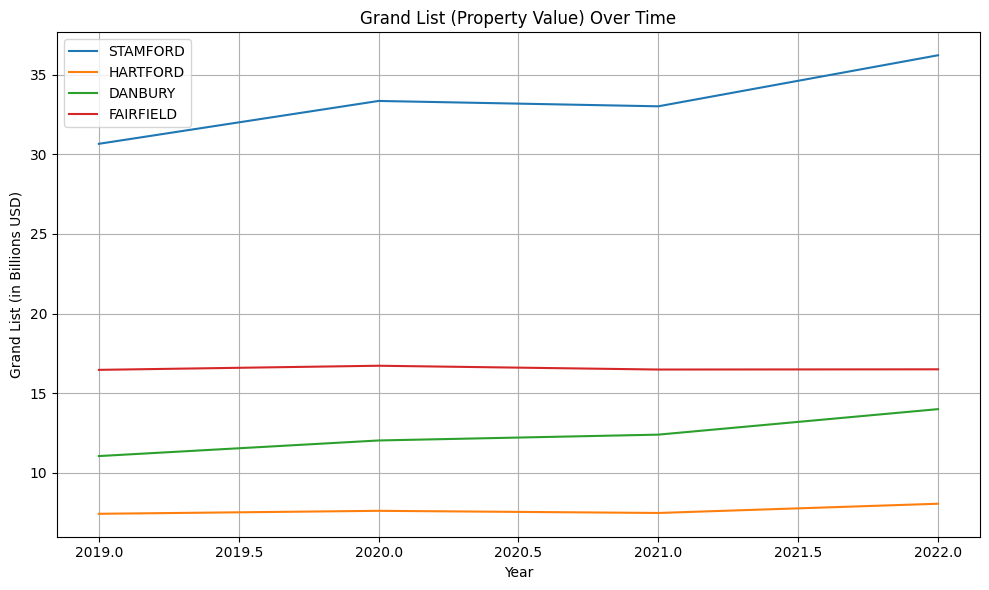

In [ ]:
import matplotlib.pyplot as plt

# Pick a few towns to show
selected_towns = ["STAMFORD", "HARTFORD", "DANBURY", "FAIRFIELD"]

# Create the plot
plt.figure(figsize=(10, 6))
for town in selected_towns:
    subset = df_clean[df_clean["Municipality name"] == town]
    plt.plot(subset["Year"], subset["Grand List"] / 1e9, label=town)  # Convert to billions

plt.title("Grand List (Property Value) Over Time")
plt.xlabel("Year")
plt.ylabel("Grand List (in Billions USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This chart shows how the total property value (the grand list) — changed over time in four Connecticut towns:
Stamford, Hartford, Danbury, and Fairfield.

Stamford has the highest property value, and it keeps going up every year.

Danbury also shows steady growth. It’s going up slowly but clearly.

Fairfield is mostly flat. Its property value is staying about the same.

Hartford has the lowest value of the four, but it’s slowly starting to rise again after dipping a little.

Stamford got a hospital in 2016 at a cost of $450 million, which makes the property value go up. More buildings mean more property tax revenue for the town. The hospital began its expansion, which included buying surrounding houses. The hospital increased its campus from 20 acres to 30 acres by purchasing about 40 properties in the neighborhood.
https://www.stamfordadvocate.com/news/article/stamford-ct-development-growth-before-after-17392726.php

Danbury shows a clear, steady upward trend in property value from 2019 to 2022.The article highlights that even though inventory was low at times, homes were selling quickly, and many properties received multiple offers. Inventory refers to the number of homes that are currently available for sale.
This increased buyer activity has likely driven up home values, contributing to the town’s rising Grand List.
https://www.newstimes.com/news/article/danbury-housing-market-shows-growth-listings-sales-19990673.php

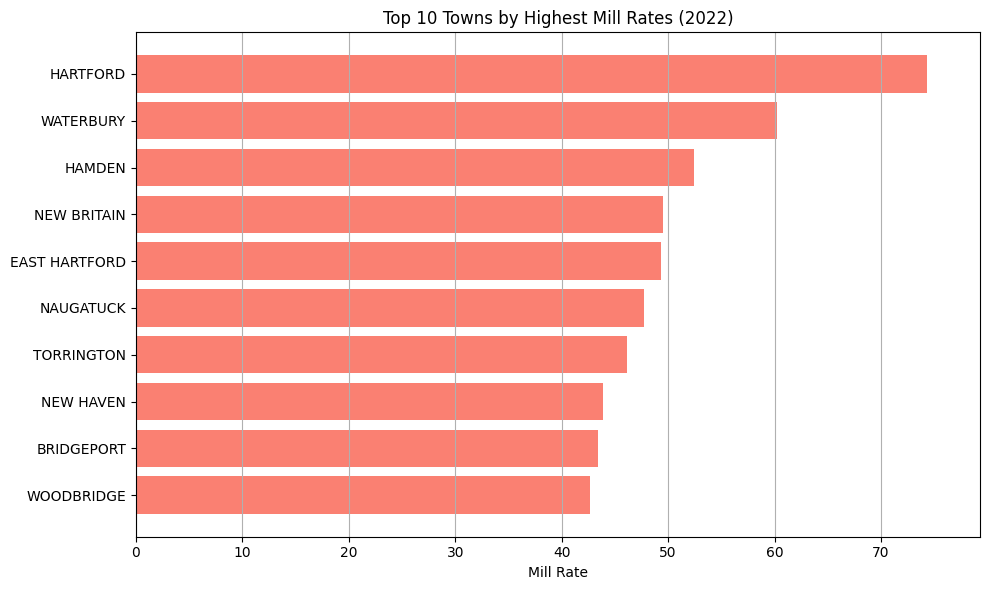

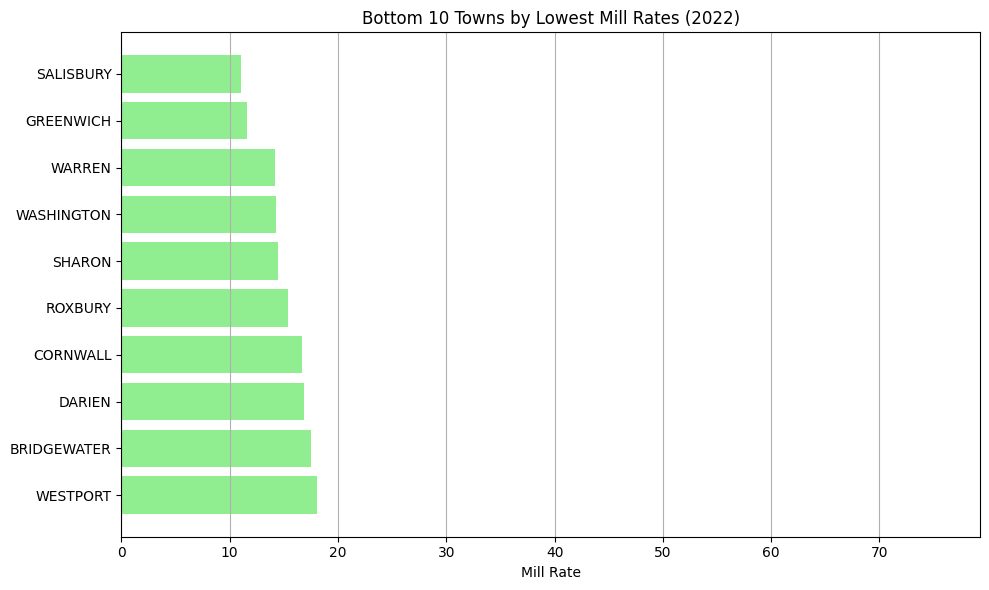

In [ ]:

# Step 1: Get the most recent year from your cleaned dataset
latest_year = df_clean["Year"].max()

# Step 2: Filter for that year
latest_mill_rates = df_clean[df_clean["Year"] == latest_year]

# Step 3: Get top and bottom 10 mill rate towns
top10 = latest_mill_rates.nlargest(10, "Mill Rate").sort_values("Mill Rate", ascending=True)
bottom10 = latest_mill_rates.nsmallest(10, "Mill Rate").sort_values("Mill Rate", ascending=False)

# Step 4: Set a common x-axis limit (based on max from top10)
max_rate = top10["Mill Rate"].max() + 5  # Add padding

# --- Plot Top 10 Highest Mill Rates ---
plt.figure(figsize=(10, 6))
plt.barh(top10["Municipality name"], top10["Mill Rate"], color='salmon')
plt.xlim(0, max_rate)
plt.title(f"Top 10 Towns by Highest Mill Rates ({latest_year})")
plt.xlabel("Mill Rate")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# --- Plot Bottom 10 Lowest Mill Rates ---
plt.figure(figsize=(10, 6))
plt.barh(bottom10["Municipality name"], bottom10["Mill Rate"], color='lightgreen')
plt.xlim(0, max_rate)
plt.title(f"Bottom 10 Towns by Lowest Mill Rates ({latest_year})")
plt.xlabel("Mill Rate")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()




These bar charts show the towns with the highest and lowest mill rates (property tax rates) in 2022.

The towns at the top of the chart — like Hartford, Waterbury, and Hamden — have some of the highest tax rates in the state. These are places where property values are generally lower.

Meanwhile, towns like Greenwich, Salisbury, and Westport are at the bottom with much lower mill rates. These towns tend to have high property values, so they can raise enough money through taxes even with a smaller rate.





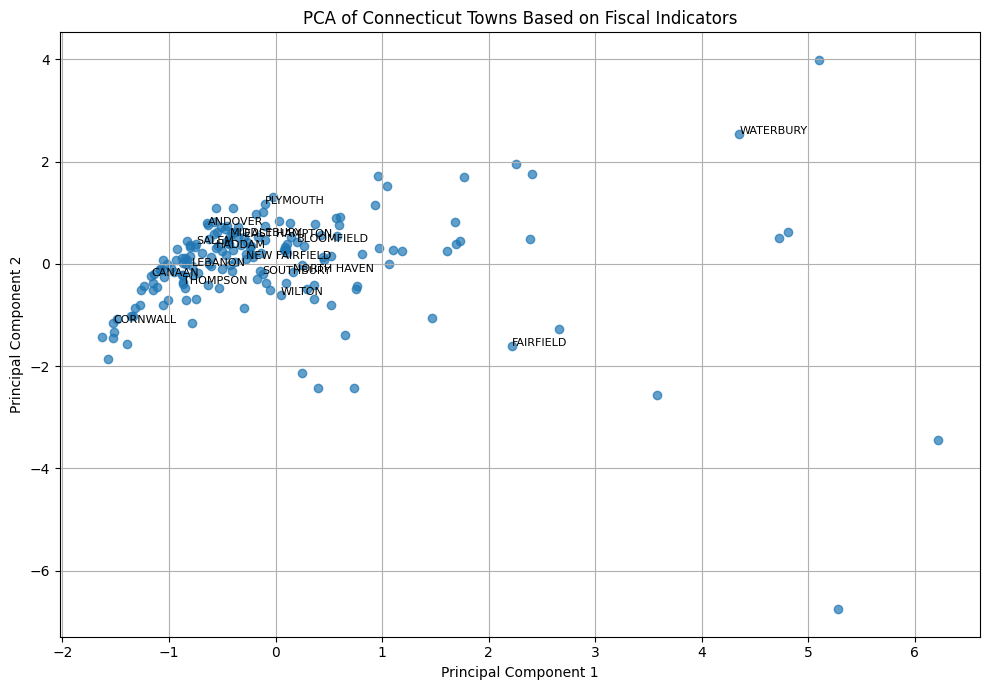

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Pick the most recent year
latest_year = df_clean["Year"].max()
df_latest = df_clean[df_clean["Year"] == latest_year].copy()

# Step 2: Select numeric columns for PCA
features = ["Population", "Grand List", "Mill Rate"]
X = df_latest[features].dropna()

# Save the town names
town_names = df_latest.loc[X.index, "Municipality name"]

# Step 3: Standardize the features (PCA works best with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot the PCA result
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)

# Optional: label a few standout towns
for i, name in enumerate(town_names):
    if i % 10 == 0:  # label every 10th town to reduce clutter
        plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8)

plt.title("PCA of Connecticut Towns Based on Fiscal Indicators")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Towns that are close together have similar fiscal profiles.

Towns that are far away from the cluster are very different from most others.

Most towns are tightly grouped in the center-left area
→ This means most towns in CT have similar tax rates, property values, and population sizes.

Waterbury stands out on the far right
→ Waterbury is very different — probably due to a very high mill rate, lower property value, or larger population relative to similar towns.
(The earlier bar chart confirms this — Waterbury had one of the highest mill rates.)

Fairfield is also far from the rest
→ Likely due to very high property values and low mill rate — it’s wealthy but doesn’t have to charge high taxes.

Cornwall is on the far left
→ Suggests it’s very different from the rest too — maybe a small population, low tax rate, or lower overall property value.

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Use the cleaned and prepared latest-year data
latest_year = df_clean["Year"].max()
df_latest = df_clean[df_clean["Year"] == latest_year].copy()

# Select features for PCA
features = ["Population", "Grand List", "Mill Rate"]
X = df_latest[features].dropna()
town_names = df_latest.loc[X.index, "Municipality name"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a dataframe for Plotly
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Municipality"] = town_names.values

# Plot with Plotly
fig = px.scatter(
    df_pca,
    x="PC1",
    y="PC2",
    hover_name="Municipality",
    title="Interactive PCA of CT Towns Based on Fiscal Indicators",
    labels={"PC1": "Principal Component 1", "PC2": "Principal Component 2"}
)

fig.update_traces(marker=dict(size=8))
fig.show()


PC1 is a mix of Population Grand list (property value).

Towns far to the right on PC1 (like Waterbury or Fairfield) likely have high population or high property value.

Towns far to the left (like Cornwall) are smaller and less wealthy.


PC2 explains the next biggest difference, that isn’t already captured by PC1.

It might be picking up things like, differences in mill rate (how high taxes are) and different mix of high value but low population, or vice versa.

It helps separate towns that have similar total size but very different tax policies or land values.




# **EDA**


*   Grand List Over Time: Stamford and Danbury are growing. Hartford and Fairfield are flat.
*   Mill Rate Comparison: Wealthier towns can afford lower rates.
* Population vs Grand List Scatter: Most towns stay close to zero; a few gain both people and value, while some show mismatch.
*  Outliers: A few towns gain population without gaining wealth — or lose one but not the other.








# **Data Analysis**

The data shows that towns with higher property values tend to have lower mill rates. This makes sense — they can raise enough tax money without taxing heavily. But not all growth is equal. Some towns are gaining people but not property value, while others are gaining value without population growth.


# **Narrative Genre & Visual Choices**

**Visual Narrative Tools Used (Segal & Heer Figure 7)**
Annotations: Each major chart is paired with a short, easy-to-read paragraph that explains the key takeaway for that plot.

Multi-view: The notebook uses different chart types (bar charts, line plots, and scatter plots) to show trends in mill rates, grand list values, and population together.

Linked Navigation: The story moves through structured sections—starting with general fiscal trends, then moving into comparisons by town and linking to demographic data.

**Narrative Structure Tools Used**

Ordering: The story flows in a timeline from 2019 to 2022, helping the user follow how towns have changed year by year.

Highlighting: Towns with very high or low mill rates are shown clearly in top-10 and bottom-10 bar charts, with bright color differences.

Context: Comments in the notebook explain why changes matter, including economic challenges towns face and how population growth or loss connects to town wealth.




# **Visualizations**

The visualizations were chosen to support the story about how fiscal and population factors shape the housing and economic situation in Connecticut towns:

- **Grand List (Property Value) Over Time**  
  This line plot shows how total property values have changed in each town over several years. It helps highlight towns with strong economic growth (e.g., Stamford) versus those that are flat or declining.

- **Top 10 Towns by Highest Mill Rates**  
  This bar chart shows which towns had the highest tax rates in the latest available year. It supports the story about how some towns need to tax more heavily, often due to lower property values or budget needs.

- **Bottom 10 Towns by Lowest Mill Rates**  
  This complements the chart above and shows which towns can afford to keep taxes low — often because they have high property values.

- **Change in Population vs. Change in Grand List (Most Recent Year)**  
  This scatterplot compares recent changes in population with changes in property value. It shows whether growth in people is accompanied by economic growth, or if some towns are growing in one area but not the other.

- **PCA of Connecticut Towns Based on Fiscal Indicators**  
  This chart summarizes three  fiscal variables (population, mill rate, and grand list) into two components. It reveals which towns have unusual or unique profiles — for example, Waterbury and Cornwall stand out for opposite reasons.




# **Discussion & Reflection**

This project helped me understand how different fiscal indicators reflect the economic situation of towns in Connecticut. By combining real estate sales data with mill rates, grand list values, and population trends, I could spot clear patterns in which towns are growing, stable, or shrinking.

What worked well was using visualizations to compare towns side by side. It was especially effective to sort towns by mill rate or grand list value and look for outliers. Cleaning the dataset took time, especially aligning the town names, but it made the analysis more reliable.

One challenge was that not every year had complete data for every town, and the town names were not always consistent across files. I had to drop or fix some rows to make the datasets compatible.

If I had more time, I would improve the completeness of the fiscal dataset, maybe by finding older mill rate data or adding other economic indicators like income or housing affordability. I would also explore more interactive visualizations, so users could explore specific towns on their own.

Overall, this project showed me how fiscal policy and public data can tell a story about a region’s housing market.


# **Conclusion**

Connecticut’s towns are not all alike — and that becomes clear when we look at their finances. Behind every town’s budget is a mix of how much property it has, how many people it serves, and how much tax it needs to collect. This notebook explores those patterns using municipal fiscal indicators from 2019 to 2022. When we connect the dots, we see how local tax policies and economic realities are deeply linked.

A town’s grand list (the total value of all taxable property) is a core part of its financial power. Some towns, like Stamford and Danbury, have seen strong growth in property value. Others, like Hartford and Fairfield, have stayed flat. This shows that not every place is sharing in the same kind of economic momentum — even if they’re not far apart.

The mill rate is where this difference really shows. Wealthier towns with high property values, like Greenwich or Westport, can keep tax rates low and still bring in lots of money. In contrast, towns like Hartford or Waterbury have to set much higher tax rates just to fund basic services. This creates a kind of financial inequality, where some towns are stuck charging more while still having less to spend.

By adding in population, we get a fuller picture. Some towns are growing fast — gaining both people and taxable property — while others are shrinking or staying the same. When we compare changes in population with changes in the grand list, we see that growth in people doesn’t always mean growth in wealth. Some towns are gaining residents but not expanding their tax base, which can create strain on schools, roads, and services.

We also saw how mill rates reflect pressure. In places with slower growth or lower property values, towns often have to raise taxes to keep up. In other places, fast-growing towns can actually lower taxes — or at least hold them steady — because their property base is expanding.

In short, Connecticut’s fiscal landscape is shaped by imbalance: in wealth, in people, and in pressure. Understanding this helps us see why some towns thrive while others struggle — and how policies around taxation, development, and housing can make a difference.